<a href="https://colab.research.google.com/github/NguyenThienPhat/NguyenThienPhat-24_02_2023/blob/main/Du_don_tuong_lai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
%cd /content/drive/MyDrive/bai1

/content/drive/MyDrive/bai1


In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/bai1', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 80 images belonging to 4 classes.


{'giau': 0, 'hanhphuc': 1, 'ngheo': 2, 'sieusao': 3}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
3/3 [==============================] - 36s 4s/step - loss: 13.6770 - accuracy: 0.1875
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 4.3732 - accuracy: 0.3000
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 0.9830 - accuracy: 0.5750
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 0.5039 - accuracy: 0.9375
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 0.2636 - accuracy: 0.9250
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 0.1730 - accuracy: 0.9250
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 0.1728 - accuracy: 0.9250
Epoch 8/50
3/3 [==============================] - 4s 1s/step - loss: 0.2382 - accuracy: 0.9375
Epoch 9/50
3/3 [==============================] - 4s 1s/step - loss: 0.2806 - accuracy: 0.8875
Epoch 10/50
3/3 [==============================] - 4s 1s/step - loss: 0.0700 - accuracy: 0.9750
Epoch 11/50
3/3 [==============================

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.0007065002573654056
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


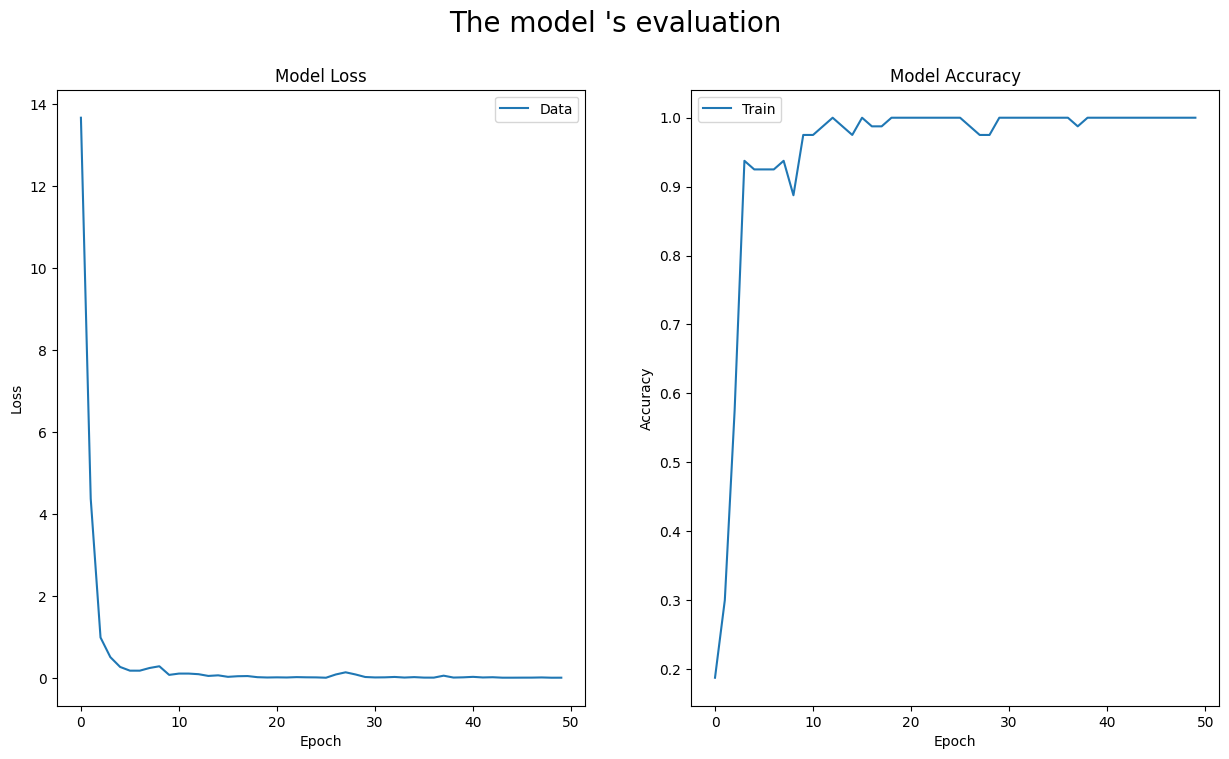

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Saved_Train/bai1.h5')

In [ ]:

model_1 = load_model('/content/drive/MyDrive/Saved_Train/bai1.h5')

1/1 [==============================] - 0s 299ms/step
Tuong lai  : hanhphuc


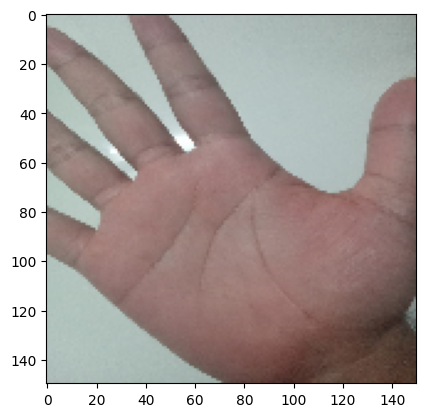

1/1 [==============================] - 0s 18ms/step
Tuong lai  : ngheo


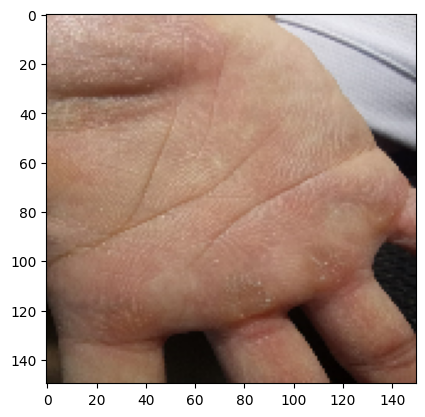

1/1 [==============================] - 0s 27ms/step
Tuong lai  : giau


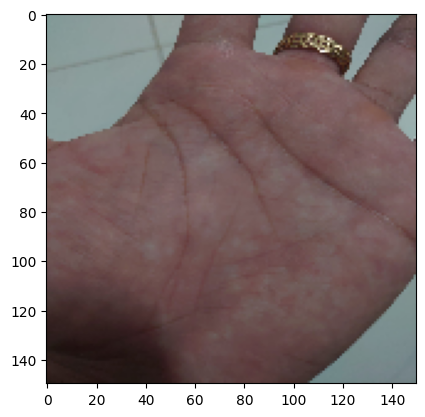

1/1 [==============================] - 0s 25ms/step
Tuong lai  : sieusao


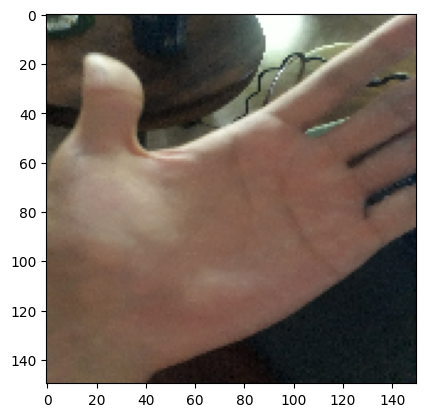

In [ ]:
folder='/content/drive/MyDrive/test1/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['giau', 'hanhphuc', 'ngheo', 'sieusao']
  print('Tuong lai  : {}'.format(class_name[result]))
  plt.show()